# 20기 KNN 정규세션 과제

**데이터:** [blackfriday | Kaggle](https://www.kaggle.com/llopesolivei/blackfriday)

---

## 0. 데이터 불러오기

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

df = pd.read_csv("blackfriday.csv", index_col = 0)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1001088,P00046042,F,0-17,10,A,3,0,5,17.0,NaN,2010
1,1004493,P00347742,F,0-17,10,A,1,0,7,NaN,NaN,4483
2,1005302,P00048942,F,0-17,10,A,1,0,1,4.0,NaN,7696
3,1001348,P00145242,F,0-17,10,A,3,0,2,4.0,NaN,16429
4,1001348,P00106742,F,0-17,10,A,3,0,3,5.0,NaN,5780


## 1. Preprocssing / EDA

#### 데이터 확인

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4998 entries, 0 to 4997
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     4998 non-null   int64  
 1   Product_ID                  4998 non-null   object 
 2   Gender                      4998 non-null   object 
 3   Age                         4998 non-null   object 
 4   Occupation                  4998 non-null   int64  
 5   City_Category               4998 non-null   object 
 6   Stay_In_Current_City_Years  4998 non-null   object 
 7   Marital_Status              4998 non-null   int64  
 8   Product_Category_1          4998 non-null   int64  
 9   Product_Category_2          3465 non-null   float64
 10  Product_Category_3          1544 non-null   float64
 11  Purchase                    4998 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 507.6+ KB


In [50]:
#분석에 필요없는 변수 삭제
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [51]:
# 수치형 변수 통계값
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,4998.000000,4998.000000,4998.000000,3465.000000,1544.000000,4998.000000
mean,8.036815,0.421369,5.320128,9.773737,12.766839,9234.655462
std,6.442697,0.493828,3.912281,5.101867,4.023591,4999.225081
min,0.000000,0.000000,1.000000,2.000000,3.000000,13.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5497.750000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8049.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12039.000000
max,20.000000,1.000000,20.000000,18.000000,18.000000,23913.000000


In [52]:
# 범주형 변수 통계값
df.describe(include='O')

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,4998,4998,4998,4998
unique,2,7,3,5
top,M,26-35,B,1
freq,3765,1996,2102,1758


In [53]:
# Marital_Status 는 범주형이므로 데이터 타입변경
df = df.astype({'Marital_Status': 'object'})

#### 데이터 시각화

범주형

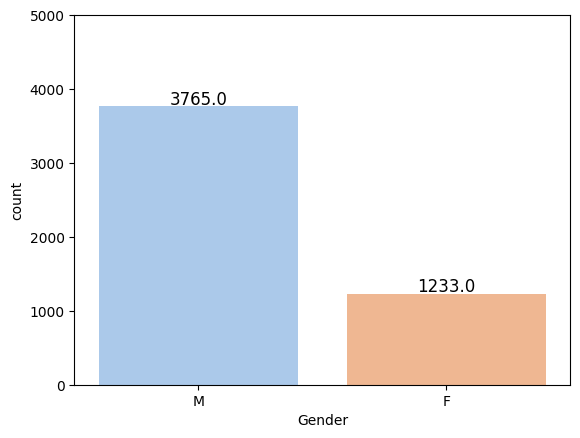

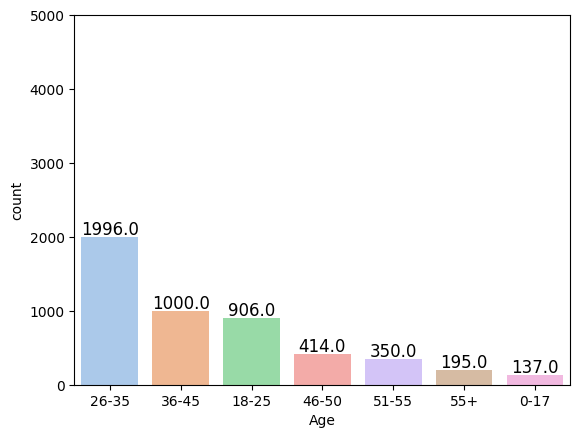

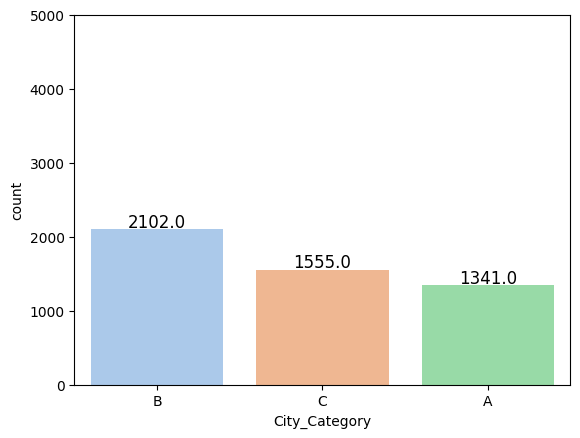

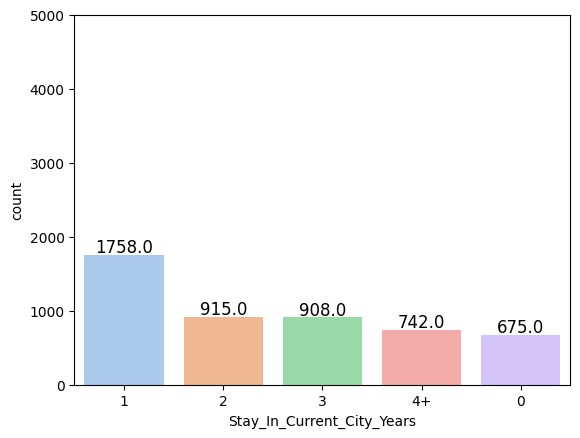

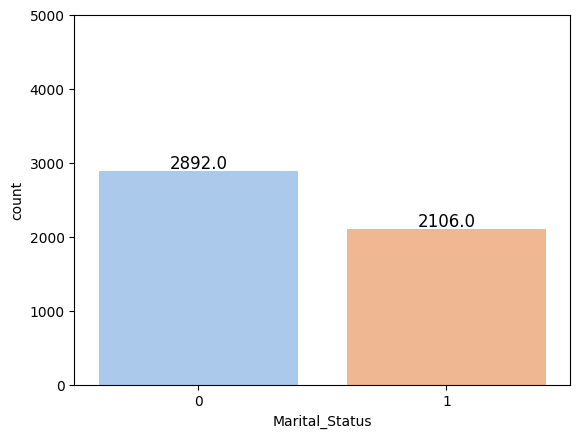

In [36]:
for col in df.columns:
    if df[col].dtype == 'object':
        ax = sns.countplot(x=col, data=df, palette = sns.color_palette("pastel"), order = df[col].value_counts().index)

        # countplot에 값 표시
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 30, height, ha = 'center', size = 12)
        ax.set_ylim(0, 5000)
        plt.show()

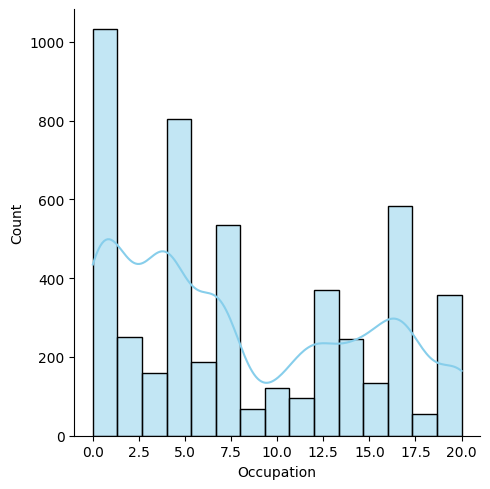

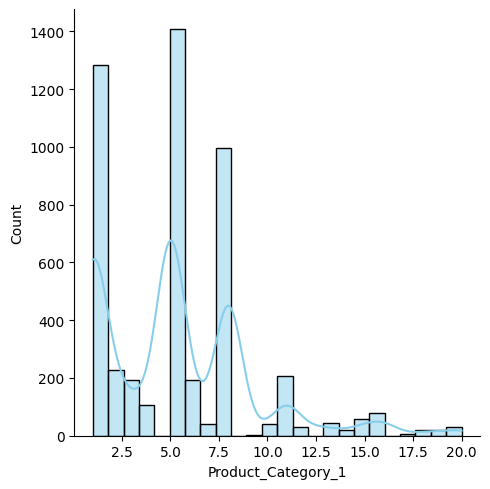

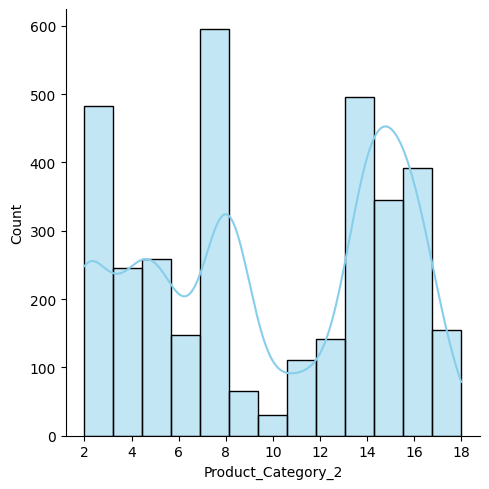

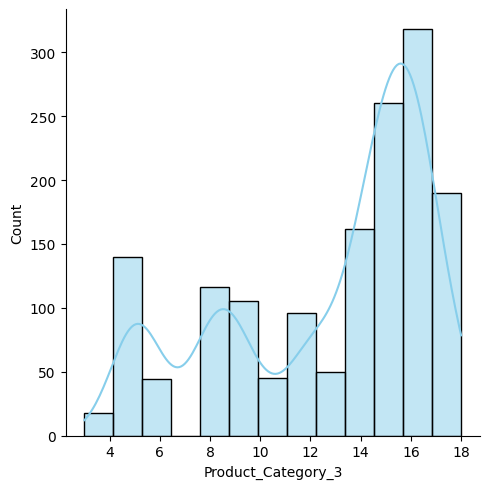

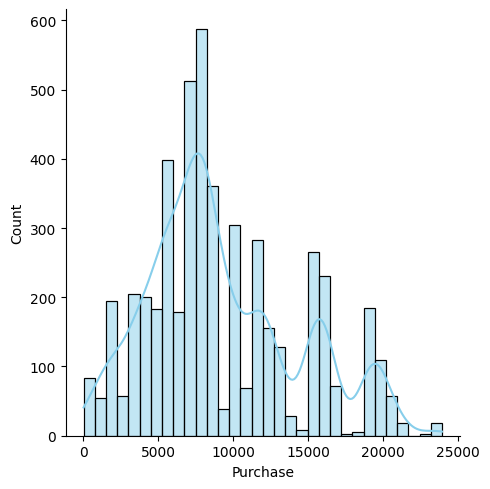

In [66]:
# 수치형
for col in df.columns:
    if df[col].dtype != 'object':
        ax = sns.displot(df[col], color="skyblue", kde=True)
        plt.show()

모든 수치형변수가 정규분포를 띄지 않음

#### 결측치 확인

In [54]:
df.isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            1533
Product_Category_3            3454
Purchase                         0
dtype: int64

- Product_Category_2

In [55]:
print("Product_Category_2\n평균 :", np.mean(df["Product_Category_2"]), 
      "\n최빈값 :", df["Product_Category_2"].mode()[0])

Product_Category_2
평균 : 9.773737373737374 
최빈값 : 8.0


In [56]:
# 최빈값으로 대체
df.Product_Category_2 = df.Product_Category_2.fillna(df["Product_Category_2"].mode()[0])

- Product_Category_3

In [57]:
print("Product_Category_3\n평균 :", np.mean(df["Product_Category_3"]), 
      "\n최빈값 :", df["Product_Category_3"].mode()[0])

Product_Category_3
평균 : 12.766839378238341 
최빈값 : 16.0


Product_Category_3의 결측 수는 전체 데이터의 약 70%이므로 제거하겠음

In [58]:
df.drop(['Product_Category_3'], axis=1, inplace=True)

#### 범주형 변수 더미화

In [59]:
df = pd.get_dummies(df, drop_first=True)  ## 가변수 n-1개 생성

C:\Users\user\AppData\Local\Temp\ipykernel_23080\4047626364.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df = pd.get_dummies(df, drop_first=True)  ## 가변수 n-1개 생성


#### 수치형 변수 스케일링
정규화(Normalization)

In [60]:
# Preprocessing
X = df.drop(['Purchase'], axis=1)
y = df["Purchase"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [61]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)   ##train 데이터에 대해 적합##

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2. KNN 구현 & 파라미터 튜닝

### KNN

In [62]:
# Training and Predictions
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors = 5, weights = "distance")
regressor.fit(X_train , y_train)

y_pred = regressor.predict(X_test)

In [67]:
# Evaluating the Algorithm
from math import sqrt
from sklearn.metrics import mean_squared_error 

sqrt(mean_squared_error(y_test,y_pred))   #RMSE

5015.659575669223

### Hyperparameter Tuning

최적 k값과 distance 정하기

In [64]:
from sklearn.model_selection import GridSearchCV

param_knn = {"n_neighbors": [17, 19, 23, 25, 27, 29, 31, 33, 39],
            "weights":['uniform', 'distance'],
            'metric' : ['euclidean', 'manhattan', 'minkowski']}

gscv_knn = GridSearchCV(estimator = regressor, param_grid=param_knn, scoring='neg_root_mean_squared_error', cv=3, n_jobs=-1,verbose=2)
gscv_knn.fit(X_train, y_train)

#best f1_macro 수치와 best parameter확인
print("best RMSE : {0: .4f}".format(gscv_knn.best_score_))
print("best param : ",gscv_knn.best_params_)

#dataframe으로 랭킹순보기
result_df = pd.DataFrame(gscv_knn.cv_results_)
result_df.sort_values(by=['rank_test_score'],inplace=True)

#plot
result_df[['params','mean_test_score','rank_test_score']].head(10)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
best RMSE : -4519.5269
best param :  {'metric': 'manhattan', 'n_neighbors': 39, 'weights': 'distance'}


,params,mean_test_score,rank_test_score
35,"{'metric': 'manhattan', 'n_neighbors': 39, 'we...",-4519.526946,1
31,"{'metric': 'manhattan', 'n_neighbors': 31, 'we...",-4519.614156,2
33,"{'metric': 'manhattan', 'n_neighbors': 33, 'we...",-4520.565582,3
29,"{'metric': 'manhattan', 'n_neighbors': 29, 'we...",-4525.667574,4
27,"{'metric': 'manhattan', 'n_neighbors': 27, 'we...",-4526.185354,5
25,"{'metric': 'manhattan', 'n_neighbors': 25, 'we...",-4528.791659,6
23,"{'metric': 'manhattan', 'n_neighbors': 23, 'we...",-4535.202668,7
21,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",-4554.162900,8
19,"{'metric': 'manhattan', 'n_neighbors': 17, 'we...",-4560.468510,9
26,"{'metric': 'manhattan', 'n_neighbors': 27, 'we...",-4580.799522,10


## 3. Evaluation

In [69]:
# 최종모델
regressor = KNeighborsRegressor(n_neighbors = 39, weights = "distance", metric="manhattan")
regressor.fit(X_train , y_train)

y_pred = regressor.predict(X_test)
sqrt(mean_squared_error(y_test,y_pred))

4685.513808242572